https://towardsdatascience.com/time-series-and-correlations-with-stock-market-data-using-python-e66774e3a16f

In [49]:
import config
import os
os.environ['IEX_TOKEN'] = 'sk_09508c140ada49a68b6b68c3210f84a7'
from datetime import datetime
import pandas as pd
from iexfinance.stocks import get_historical_data
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
start = datetime(2017, 1, 1)
end = datetime(2019, 11, 22)

Now, let’s make an API call and download more data, ‘SPDR S&P 500 Trust ETF,’ which tracks the S&P 500 (ticker: SPY). We’ll be using this later in some correlation tests.

Text(0.5, 1.0, 'Daily Time Series for the SPY')

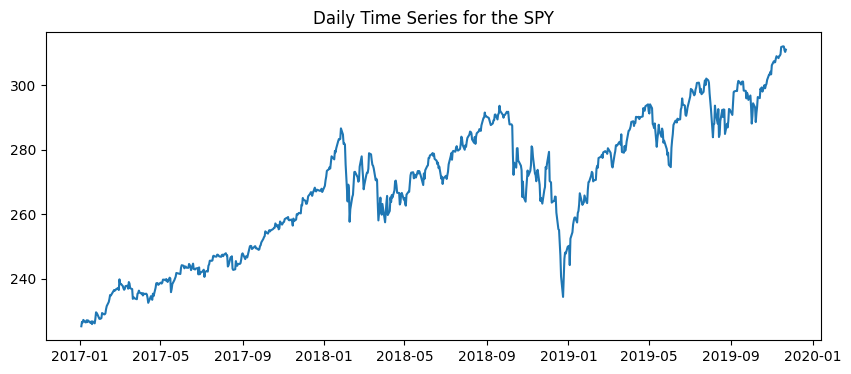

In [51]:
SPY = get_historical_data('SPY', start, end, clear_output='pandas')
plt.figure(figsize=(10,4))
plt.plot(SPY.index, SPY['close'])
plt.title('Daily Time Series for the SPY')

Now, let’s continue to explore the API by downloading data for the FAANG stocks (Facebook, Amazon, Apple, Netflix, and Google) (Kenton, 2019), as well as add an interest of mine, Tesla. Also, chart these up. Pay careful attention to the charts and do a comparison of those with the SPY chart above. Some of these will look very similar to the SPY chart, some won’t.

In [52]:
FB= get_historical_data("FB", start, end, output_format='pandas').iloc[:,:6]
AMZN= get_historical_data("AMZN", start, end, output_format='pandas').iloc[:,:6]
AAPL= get_historical_data("AAPL", start, end, output_format='pandas').iloc[:,:6]
NFLX= get_historical_data("NFLX", start, end, output_format='pandas').iloc[:,:6]
GOOG= get_historical_data("GOOG", start, end, output_format='pandas').iloc[:,:6]
TSLA= get_historical_data("TSLA", start, end, output_format='pandas').iloc[:,:6]

Text(0.5, 1.0, 'Daily Times Series for the TSLA')

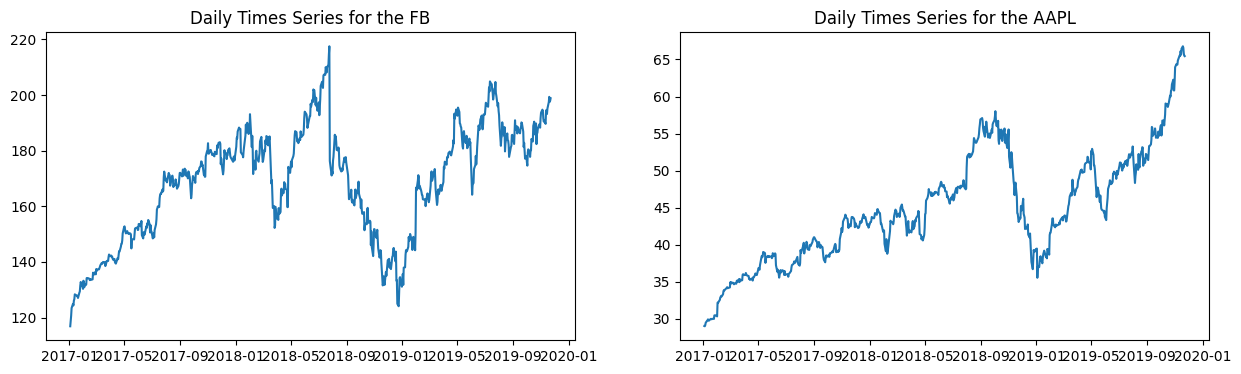

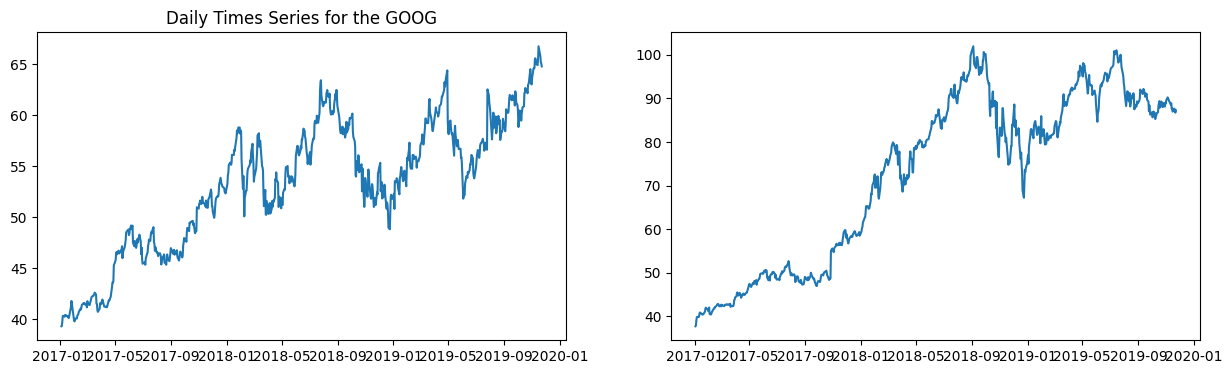

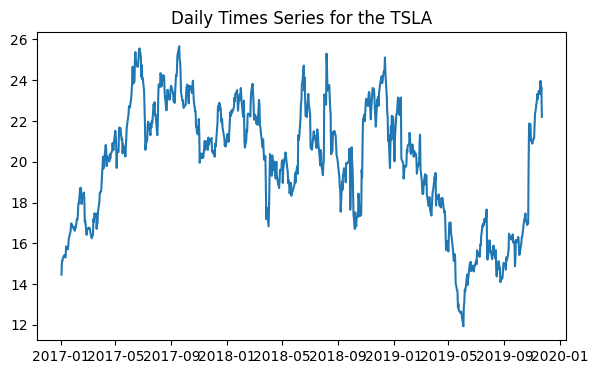

In [53]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(FB.index, FB.close)
plt.title('Daily Times Series for the FB')
plt.subplot(1,2,2)
plt.plot(AAPL.index, AAPL.close)
plt.title('Daily Times Series for the AAPL')
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(GOOG.index, GOOG.close)
plt.title('Daily Times Series for the GOOG')
plt.subplot(1,2,2)
plt.plot(AMZN.index, AMZN.close)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(TSLA.index, TSLA.close)
plt.title('Daily Times Series for the TSLA')

Now that we have data for both the FAANG stocks (and TSLA) and the S&P 500, and we’ve plotted these so that we know what they look like; let’s try an experiment! We’re going to try a Pearson Correlation test, to test correlation on all of these equities and the S&P 500.

Correlation will show when the Pearson Correlation Coefficient is between -1 and +1. If closer to +1, we’re seeing a positive correlation. If Pearson’s correlation is closer to -1, a negative correlation (Cheong, 2019).


In [54]:
import scipy.stats as stats

c, p = stats.pearsonr(FB.dropna().close, SPY.dropna().close)
print(f'FB vs SPY Pearson Correlation: {c}\n')

c, p = stats.pearsonr(NFLX.dropna().close, SPY.dropna().close)
print(f'NFLX vs SPY Pearson Correlation: {c}\n')

c, p = stats.pearsonr(TSLA.dropna().close, SPY.dropna().close)
print(f'TSLA vs SPY Pearson Correlation: {c}\n')

SPY_short = SPY.drop('2017-07-03 00:00:00',axis=0)
c, p = stats.pearsonr(AMZN.dropna().close, SPY_short.close)
print(f'AMZN vs SPY Pearson Correlation: {c}\n')

c, p = stats.pearsonr(AAPL.close, SPY_short.close)
print(f'AAPL vs SPY Pearson Correlation: {c}\n')

c, p = stats.pearsonr(GOOG.dropna().close, SPY_short.dropna().close)
print(f'GOOG vs SPY Pearson Correlation: {c}\n')

FB vs SPY Pearson Correlation: 0.7325440193627261

NFLX vs SPY Pearson Correlation: 0.8000825820997518

TSLA vs SPY Pearson Correlation: -0.2696799040939382

AMZN vs SPY Pearson Correlation: 0.9107069103390985

AAPL vs SPY Pearson Correlation: 0.9174456001269293

GOOG vs SPY Pearson Correlation: 0.948478079194303



As of 11/22/2019, Google (GOOG) has the highest Pearson Correlation Coefficient out of all of these options. Also, Tesla (TSLA) has negative correlation to the S&P 500. Many of these you could find by looking in the charts above and comparing the charts with the S&P 500 chart; but now you have a quantitative approach for correlation!

Now, to explore the API a bit more, let’s see how the social sentiment feature looks. We’ll take a look at yesterday (11/22/2019), for Tesla.